# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 23486 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model.***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Leraning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting, Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
!pip install matplotlib==3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv", index_col=0)

In [5]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [6]:
strategy = tf.distribute.TPUStrategy(resolver)

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [8]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Data Wrangling

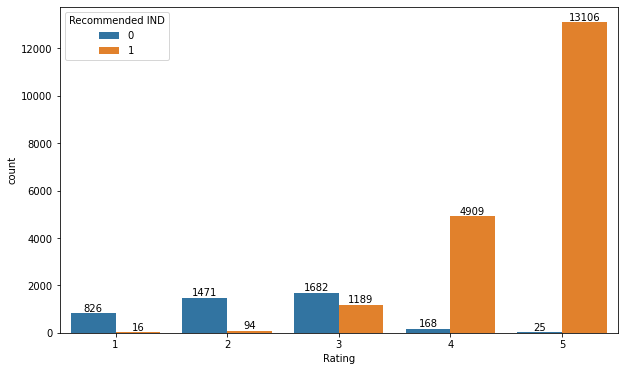

In [9]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [10]:
df["Recommended IND"].unique()

array([1, 0])

In [11]:
len(df)

23486

In [12]:
len(df[(df["Rating"] == 1) & (df["Recommended IND"] == 1)])

16

In [13]:
len(df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))])

23470

In [14]:
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

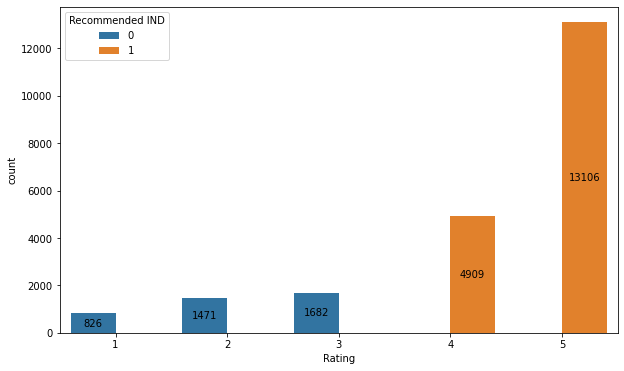

In [15]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p, label_type="center")

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

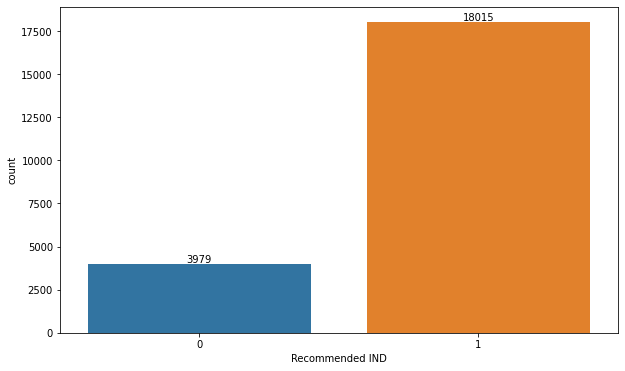

In [16]:
plt.fig = plt.figure(figsize = (10,6))
ax = sns.countplot(x="Recommended IND", data=df)
ax.bar_label(ax.containers[0]);

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [17]:
df.rename(columns={"Review Text":"text", "Recommended IND":"label"}, inplace=True)

In [18]:
df.head()

,Clothing ID,Age,Title,text,Rating,label,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [19]:
df=df[['text','label']]
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


---
---


### Missing Value Detection

In [20]:
df.isnull().sum()

text     819
label      0
dtype: int64

In [21]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0


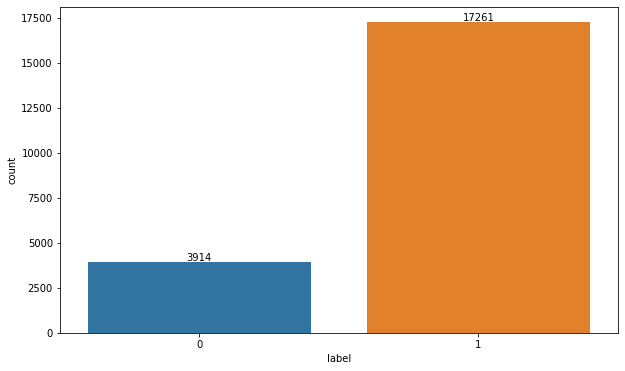

In [22]:
plt.fig = plt.figure(figsize = (10,6))
ax = sns.countplot(x="label", data=df)
ax.bar_label(ax.containers[0]);

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [23]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [24]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())
    
    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [25]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [26]:
positive_sentences = df[df["label"] == 1]["text"]
positive_sentences = positive_sentences.apply(cleaning)
positive_sentences

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
21168    bottom cute defiantly cheeky would recommend s...
21169    im impressed beautiful color combination embro...
21171    wasnt sure ordering skirt couldnt see person f...
21172    happy snag dress great price easy slip flatter...
21174    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 17261, dtype: object

In [27]:
negative_sentences = df[df["label"] == 0]["text"]
negative_sentences = negative_sentences.apply(cleaning)
negative_sentences

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
20       first not pullover styling side zipper wouldnt...
22       loved material didnt really look long dress pu...
                               ...                        
21145    tried color really pretty fun donset want pair...
21146    wanted love jacket soft great color unfortunat...
21155    purchased good price typically love maeve fabr...
21170    surprised positive review product terrible cut...
21173    fit well top see never would worked im glad ab...
Name: text, Length: 3914, dtype: object

### Collect Words (positive and negative separately)

In [28]:
positive_words = " ".join(positive_sentences)
positive_words[:1000]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose no xx kept wil ldecide later since light color alread

In [29]:
negative_words = " ".join(negative_sentences)
negative_words[:1000]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first not pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning im sure fi

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [30]:
from wordcloud import WordCloud

In [31]:
wordcloud_positive = WordCloud(background_color="white", max_words =250)

In [32]:
wordcloud_positive.generate(positive_words)

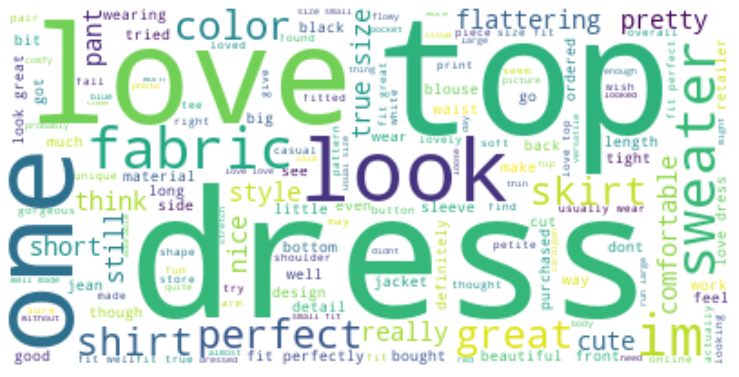

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

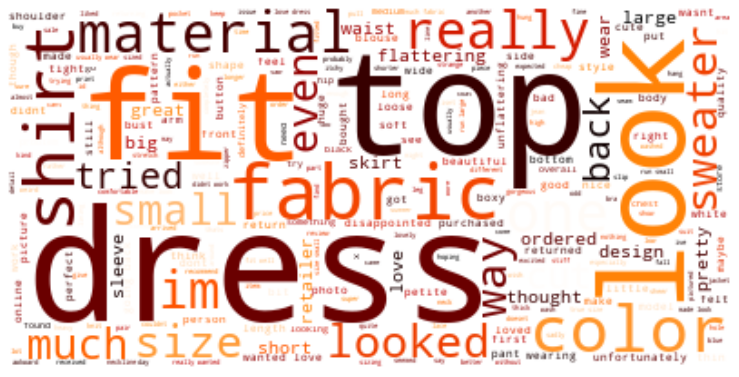

In [34]:
wordcloud_negative = WordCloud(background_color="white", max_words=250, colormap='gist_heat')

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning and Deep Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 
**For BERT model, use TF tensor.**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting,
- Deep Learning Model,
- BERT Model.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = df["text"].values
y = df["label"].map({0:1, 1:0}).values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [40]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,...,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [44]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,...,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Eval functions

In [46]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [47]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [48]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [49]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[2991  461]
 [ 102  681]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.91      3452
           1       0.60      0.87      0.71       783

    accuracy                           0.87      4235
   macro avg       0.78      0.87      0.81      4235
weighted avg       0.90      0.87      0.88      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     13809
           1       0.63      0.90      0.74      3131

    accuracy                           0.88     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.88      0.89     16940



In [50]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.870720
test_f1           0.712579
test_recall       0.866500
test_precision    0.605250
dtype: float64

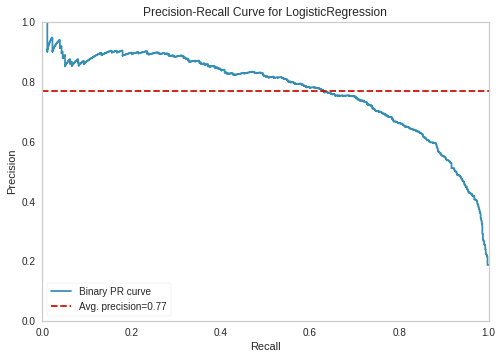

In [51]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [52]:
y_pred = log.predict(X_test_count)
log_AP_count = viz.score_
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [53]:
log = LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [54]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[2959  493]
 [ 101  682]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3452
           1       0.58      0.87      0.70       783

    accuracy                           0.86      4235
   macro avg       0.77      0.86      0.80      4235
weighted avg       0.90      0.86      0.87      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     13809
           1       0.61      0.91      0.73      3131

    accuracy                           0.88     16940
   macro avg       0.79      0.89      0.82     16940
weighted avg       0.91      0.88      0.88     16940



In [55]:
model = LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.865112
test_f1           0.707054
test_recall       0.880232
test_precision    0.590939
dtype: float64

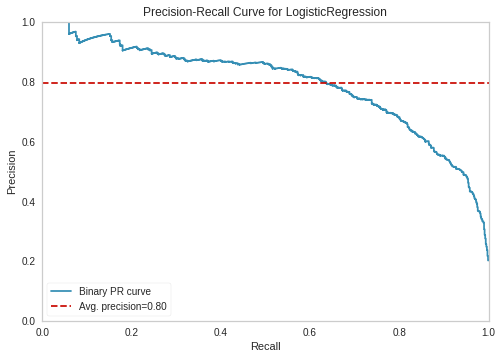

In [56]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced"),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [57]:
y_pred = log.predict(X_test_tf_idf)
log_AP_tfidf = viz.score_
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes 

### Countvectorizer

In [58]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=0.7)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=0.7)

In [59]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[3210  242]
 [ 159  624]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3452
           1       0.72      0.80      0.76       783

    accuracy                           0.91      4235
   macro avg       0.84      0.86      0.85      4235
weighted avg       0.91      0.91      0.91      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     13809
           1       0.76      0.86      0.81      3131

    accuracy                           0.92     16940
   macro avg       0.86      0.90      0.88     16940
weighted avg       0.93      0.92      0.92     16940



In [60]:
model = MultinomialNB(alpha=0.7)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.903306
test_f1           0.753693
test_recall       0.800064
test_precision    0.712728
dtype: float64

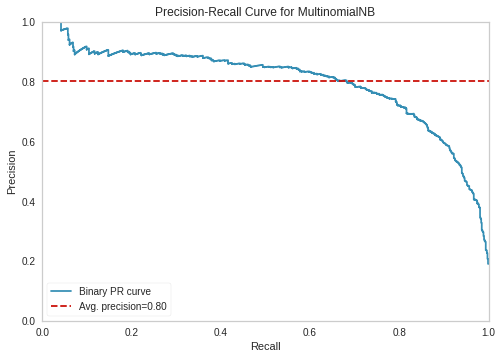

In [61]:
viz = PrecisionRecallCurve(
    MultinomialNB(alpha=0.7),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [62]:
y_pred = nb.predict(X_test_count)
nb_AP_count = viz.score_
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [63]:
nb = BernoulliNB(alpha=0.6)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.6)

In [64]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3214  238]
 [ 174  609]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3452
           1       0.72      0.78      0.75       783

    accuracy                           0.90      4235
   macro avg       0.83      0.85      0.84      4235
weighted avg       0.91      0.90      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13809
           1       0.75      0.85      0.80      3131

    accuracy                           0.92     16940
   macro avg       0.86      0.89      0.87     16940
weighted avg       0.92      0.92      0.92     16940



In [65]:
model = BernoulliNB(alpha=0.6)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy     0.899823
test_f1           0.743578
test_recall       0.785695
test_precision    0.705982
dtype: float64

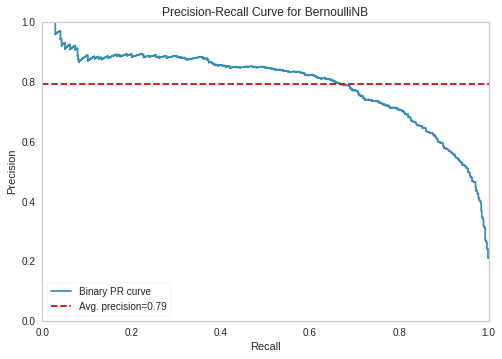

In [66]:
viz = PrecisionRecallCurve(
    BernoulliNB(alpha=0.6),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [67]:
y_pred = nb.predict(X_test_tf_idf)
nb_AP_tfidf = viz.score_
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [68]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.001, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [69]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[2996  456]
 [ 101  682]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.91      3452
           1       0.60      0.87      0.71       783

    accuracy                           0.87      4235
   macro avg       0.78      0.87      0.81      4235
weighted avg       0.90      0.87      0.88      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     13809
           1       0.63      0.90      0.74      3131

    accuracy                           0.89     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.89      0.89     16940



In [70]:
model = LinearSVC(C=0.001, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.872963
test_f1           0.716858
test_recall       0.869372
test_precision    0.610020
dtype: float64

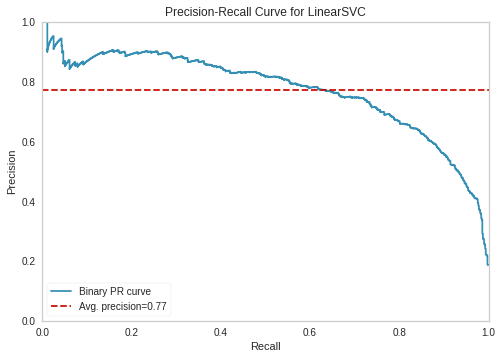

In [71]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.001, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [72]:
y_pred = svc.predict(X_test_count)
svc_AP_count = viz.score_
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [73]:
svc = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [74]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3020  432]
 [  88  695]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      3452
           1       0.62      0.89      0.73       783

    accuracy                           0.88      4235
   macro avg       0.79      0.88      0.82      4235
weighted avg       0.91      0.88      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.94     13809
           1       0.66      0.93      0.77      3131

    accuracy                           0.90     16940
   macro avg       0.82      0.91      0.86     16940
weighted avg       0.92      0.90      0.91     16940



In [75]:
model = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.883117
test_f1           0.737164
test_recall       0.886303
test_precision    0.631120
dtype: float64

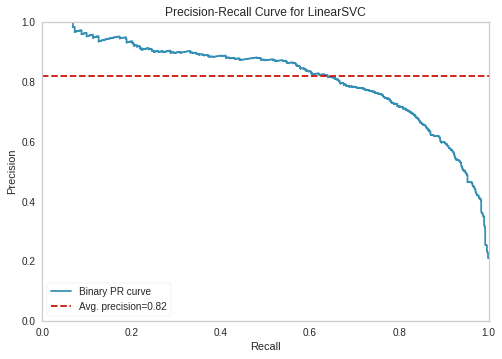

In [76]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.03, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [77]:
y_pred = svc.predict(X_test_tf_idf)
svc_AP_tfidf = viz.score_
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [79]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[2992  460]
 [ 144  639]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3452
           1       0.58      0.82      0.68       783

    accuracy                           0.86      4235
   macro avg       0.77      0.84      0.79      4235
weighted avg       0.89      0.86      0.87      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     13809
           1       0.64      0.87      0.74      3131

    accuracy                           0.89     16940
   macro avg       0.81      0.88      0.83     16940
weighted avg       0.91      0.89      0.89     16940



In [80]:
model = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.865053
test_f1           0.691423
test_recall       0.816988
test_precision    0.599714
dtype: float64

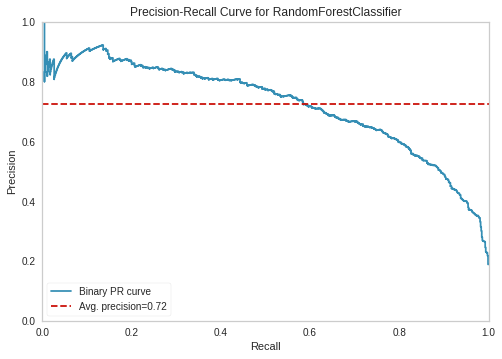

In [81]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [82]:
y_pred = rf.predict(X_test_count)
rf_AP_count = viz.score_
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [83]:
rf = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [84]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[2933  519]
 [ 143  640]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3452
           1       0.55      0.82      0.66       783

    accuracy                           0.84      4235
   macro avg       0.75      0.83      0.78      4235
weighted avg       0.88      0.84      0.85      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     13809
           1       0.62      0.90      0.73      3131

    accuracy                           0.88     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.88      0.89     16940



In [85]:
model = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.852952
test_f1           0.670373
test_recall       0.808048
test_precision    0.573264
dtype: float64

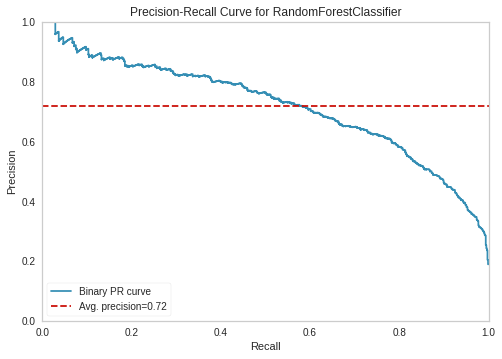

In [86]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [87]:
y_pred = rf.predict(X_test_tf_idf)
rf_AP_tfidf = viz.score_
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [88]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=500, random_state=42)

In [89]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3305  147]
 [ 280  503]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3452
           1       0.77      0.64      0.70       783

    accuracy                           0.90      4235
   macro avg       0.85      0.80      0.82      4235
weighted avg       0.89      0.90      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     13809
           1       0.86      0.72      0.79      3131

    accuracy                           0.93     16940
   macro avg       0.90      0.85      0.87     16940
weighted avg       0.92      0.93      0.92     16940



In [90]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.901181
test_f1           0.705764
test_recall       0.641640
test_precision    0.785008
dtype: float64

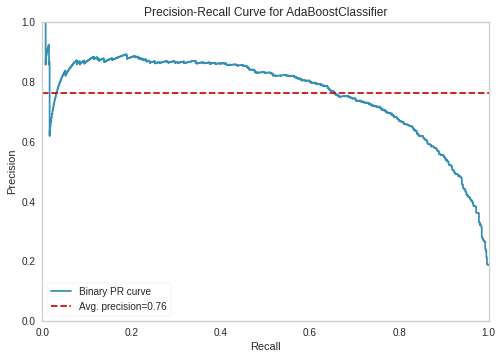

In [91]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [92]:
y_pred = ada.predict(X_test_count)
ada_AP_count = viz.score_
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [93]:
ada = AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=200, random_state=42)

In [94]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3299  153]
 [ 319  464]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3452
           1       0.75      0.59      0.66       783

    accuracy                           0.89      4235
   macro avg       0.83      0.77      0.80      4235
weighted avg       0.88      0.89      0.88      4235

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     13809
           1       0.83      0.67      0.74      3131

    accuracy                           0.91     16940
   macro avg       0.88      0.82      0.84     16940
weighted avg       0.91      0.91      0.91     16940



In [95]:
model = AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.893034
test_f1           0.675014
test_recall       0.601411
test_precision    0.770204
dtype: float64

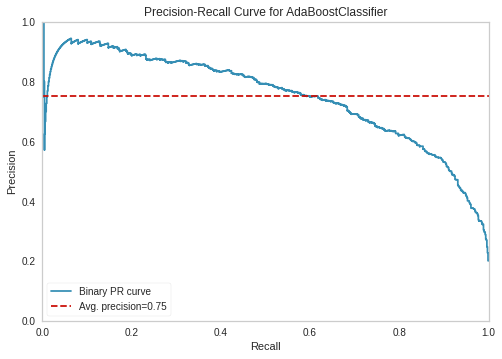

In [96]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [97]:
y_pred = ada.predict(X_test_tf_idf)
ada_AP_tfidf = viz.score_
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [99]:
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0


In [100]:
df.shape

(21175, 2)

### Tokenization

In [101]:
num_words = 15000 # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. 
# None değeri atanırsa tüm kelimeler dikkate alınır.
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' 

In [102]:
tokenizer.fit_on_texts(X)

### Creating word index

In [103]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'are': 26,
 'fit': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'or': 35,
 'too': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'perfect': 50,
 'really': 51,
 'little': 52,
 'ordered': 53,
 'if': 54,
 'these': 55,
 'will': 56,
 'one': 57,
 'flattering': 58,
 'soft': 59,
 'well': 60,
 'an': 61,
 'out': 62,
 'can': 63,
 'comfortable': 64,
 'back': 65,
 'because': 66,
 'had': 67,
 'bought': 68,
 '\r': 69,
 'nice': 70,
 'cute': 71,
 'beautiful': 72,
 'than': 73,
 'fits': 74,
 'looks': 75,
 'all': 76,
 'when': 77,
 'bit': 78,
 'down': 79,


In [104]:
len(tokenizer.word_index)

14389

### Converting tokens to numeric

In [105]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [106]:
X[100]

'The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders. i would give this top a 5/5.'

In [107]:
print(X_num_tokens[100])

[1, 80, 6, 473, 30, 5, 6, 390, 2, 24, 1, 1909, 486, 47, 3, 21, 5, 2, 238, 2140, 198, 190, 545, 14, 90, 3, 870, 311, 4, 276, 108, 5, 74, 124, 8, 22, 30, 2, 240, 31, 4, 46, 9, 76, 102, 151, 5, 6, 1, 2848, 78, 149, 9, 1, 204, 2, 43, 318, 7, 25, 4, 264, 264]


### Maximum number of tokens for all documents¶

In [108]:
len(X_num_tokens[100])

63

In [109]:
len(X_num_tokens[150])

30

In [110]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [111]:
num_tokens.mean()

60.2330106257379

In [112]:
num_tokens.max()

116

In [113]:
num_tokens.argmax()

15213

In [114]:
X[15213]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [115]:
max_tokens = 116

In [116]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [117]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [118]:
X_pad.shape

(21175, 116)

In [119]:
np.array(X_num_tokens[500])

array([   2,  104,    7,   18,   11,    3,  280,  358,    9,    5,    2,
         92,  695,    3, 1300,   17,  859,   17, 1443,    2, 1908, 3320,
          2,  285,  228,   54,    2,  347,   24,   68,    7,   57,    3,
       1908, 3320,    8,   29, 2331,   14,   32, 1170,  325,    5,  166,
         34,    3, 1170,   16,  299,    2,   68,    5,   15,   34,   12,
          4,  320,  576,   74,  124,    8,   22,    2,   38,  734,  308,
        687,  868,    3,    2,   68,   17,  383,   22,  407,    7,  116,
         17,   95,   48,   51,   46])

In [120]:
X_pad[500]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    2,  104,    7,   18,   11,    3,  280,  358,    9,    5,
          2,   92,  695,    3, 1300,   17,  859,   17, 1443,    2, 1908,
       3320,    2,  285,  228,   54,    2,  347,   24,   68,    7,   57,
          3, 1908, 3320,    8,   29, 2331,   14,   32, 1170,  325,    5,
        166,   34,    3, 1170,   16,  299,    2,   68,    5,   15,   34,
         12,    4,  320,  576,   74,  124,    8,   22,    2,   38,  734,
        308,  687,  868,    3,    2,   68,   17,  383,   22,  407,    7,
        116,   17,   95,   48,   51,   46], dtype=int32)

In [121]:
np.array(X_num_tokens[15213])

array([   2,   21,  759,  222,    2,   21,    1,   83,    3,  144,   13,
          7,  479,   77,    2,  192,    1,  438,  222,   20,  362,   62,
          2,  522,    8,   17,  485,  105,    8,  180,   57,   11,   37,
        107,    4,   82,    9,    4,   25,  425,    9,    4,  242,   61,
        419,   41,  114,   67,    4,   82,    8,  180,   15,    2,  104,
          5,    9,    1,  120,  769,    2,  117,  804,  113,    1,   25,
         11,    5,  166,   28,    2,   16, 1633,  527,  160,   13,    1,
         25,    2, 3982, 1761,    1,   22,    3,    5,   16,    4,   82,
         33,    4, 1396,    1,   25,    6,   51,   71,   54,   40,   26,
          1,  523,   78,  676,   35,  593,  143,   42,    4,   22,   35,
        265,   54,   40,   26,  107,    4])

In [122]:
X_pad[15213]

array([   2,   21,  759,  222,    2,   21,    1,   83,    3,  144,   13,
          7,  479,   77,    2,  192,    1,  438,  222,   20,  362,   62,
          2,  522,    8,   17,  485,  105,    8,  180,   57,   11,   37,
        107,    4,   82,    9,    4,   25,  425,    9,    4,  242,   61,
        419,   41,  114,   67,    4,   82,    8,  180,   15,    2,  104,
          5,    9,    1,  120,  769,    2,  117,  804,  113,    1,   25,
         11,    5,  166,   28,    2,   16, 1633,  527,  160,   13,    1,
         25,    2, 3982, 1761,    1,   22,    3,    5,   16,    4,   82,
         33,    4, 1396,    1,   25,    6,   51,   71,   54,   40,   26,
          1,  523,   78,  676,   35,  593,  143,   42,    4,   22,   35,
        265,   54,   40,   26,  107,    4], dtype=int32)

### Train Set Split

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=101)

### Modeling

In [125]:
model = Sequential()

In [126]:
embedding_size = 50

In [127]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))


model.add(GRU(units=48, return_sequences=True))
#model.add(Dropout(0.5))
#model.add(GRU(units=24, return_sequences=True))
#model.add(Dropout(0.5))
model.add(GRU(units=24))
model.add(Dense(1, activation='sigmoid'))

In [128]:
optimizer = Adam(lr=0.001)

In [129]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [130]:
model.summary() 
# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 100*48 +2*48)*3 ==> m = 100, n = 48
# (48*48 + 48*48  +2*48)*3 ==> m =  48, n = 48
# (48*48 + 48*48  +2*48)*3 ==> m =  48, n = 48

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           750000    
                                                                 
 gru (GRU)                   (None, 116, 48)           14400     
                                                                 
 gru_1 (GRU)                 (None, 24)                5328      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 769,753
Trainable params: 769,753
Non-trainable params: 0
_________________________________________________________________


In [131]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           verbose=1, patience = 1, restore_best_weights=True)

In [132]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61339642, 2.70465512])

In [133]:
model.fit(X_train, y_train, epochs=25, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
149/149 [==============================] - 24s 133ms/step - loss: 0.4307 - recall: 0.7215 - val_loss: 0.2518 - val_recall: 0.8465
Epoch 2/25
149/149 [==============================] - 18s 124ms/step - loss: 0.2192 - recall: 0.9268 - val_loss: 0.2738 - val_recall: 0.8747
Epoch 3/25
149/149 [==============================] - 19s 125ms/step - loss: 0.1672 - recall: 0.9571 - val_loss: 0.3424 - val_recall: 0.8875
Epoch 4/25
149/149 [==============================] - 19s 125ms/step - loss: 0.1354 - recall: 0.9710 - val_loss: 0.3099 - val_recall: 0.8772
Epoch 4: early stopping


### Model evaluation

In [134]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.430734,0.721544,0.251850,0.846547
1,0.219160,0.926767,0.273791,0.874680
2,0.167245,0.957139,0.342440,0.887468
3,0.135407,0.971047,0.309919,0.877238


<AxesSubplot:>

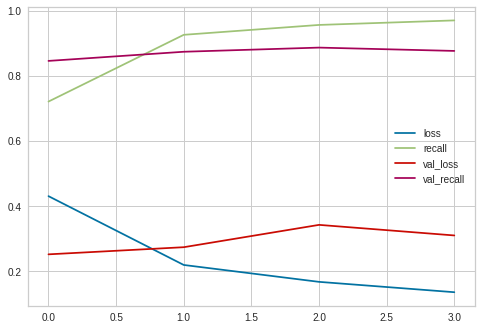

In [135]:
model_loss.plot()

In [136]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

596/596 [==============================] - 10s 16ms/step
[[14319  1215]
 [   31  3492]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     15534
           1       0.74      0.99      0.85      3523

    accuracy                           0.93     19057
   macro avg       0.87      0.96      0.90     19057
weighted avg       0.95      0.93      0.94     19057



In [137]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

67/67 [==============================] - 1s 15ms/step
[[1521  206]
 [  44  347]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1727
           1       0.63      0.89      0.74       391

    accuracy                           0.88      2118
   macro avg       0.80      0.88      0.83      2118
weighted avg       0.91      0.88      0.89      2118



In [138]:
from sklearn.metrics import precision_recall_curve, average_precision_score

67/67 [==============================] - 1s 16ms/step


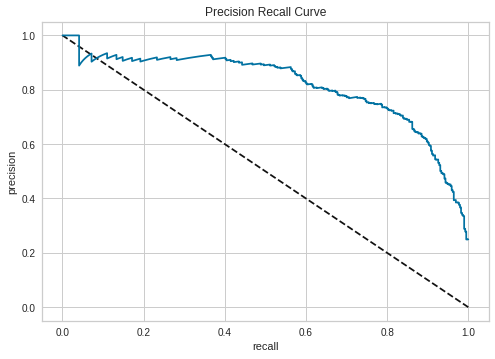

In [139]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.show()

In [140]:
average_precision_score(y_test, y_pred_proba)

0.8163555928203456

In [141]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [142]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 51.2 MB/s eta 0:00:00


### Tokenization

In [143]:
import numpy as np
import pandas as pd

In [144]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

max_len = 0

# For every sentence...
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  162


In [145]:
np.array(max_token).mean()

76.31556080283353

In [146]:
sum(np.array(max_token) <= 162) / len(max_token)

1.0

In [147]:
def transformation(X):
  # set array dimensions
  seq_len = 162
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i, :] = tokens['input_ids']
      Xmask[i, :] = tokens['attention_mask']
  return Xids, Xmask

In [148]:
Xids, Xmask = transformation(X)

In [149]:
Xids.shape

(21175, 162)

In [150]:
Xmask.shape

(21175, 162)

In [151]:
labels = y.reshape(-1,1)
labels

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

### Transformation text to tensor (Matrix to Tensor)

In [152]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels)) #tf.data.Dataset.from_tensors((Xids, Xmask, labels))

def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

# then we use the dataset map method to apply this transformation
dataset = dataset.map(map_func)

In [153]:
len(X)

21175

In [154]:
batch_size = 16
length = len(X)
# shuffle and batch
# fit into a batch of 16
dataset = dataset.shuffle(length, reshuffle_each_iteration=False).batch(batch_size, drop_remainder=True)

### Train test split

In [155]:
# set split size (90% training data) and calculate training set size
split = 0.9
size = int(len(dataset)*split) #int((Xids.shape[0]/batch_size)*split)

# get training and validation sets
train_ds = dataset.take(size)
val_ds = dataset.skip(size)

### Creating Model with TPU

In [156]:
def create_model():
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("bert-base-uncased")
    input_ids = tf.keras.layers.Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = tf.keras.layers.Dense(80, activation='relu')(embeddings) 
    x = tf.keras.layers.Dropout(0.1, name="dropout")(x) #0.1
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

In [157]:
with strategy.scope():
  
  optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [158]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

In [159]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=1) 

1190/1190 [==============================] - 171s 82ms/step - loss: 0.1816 - recall: 0.7738 - val_loss: 0.1380 - val_recall: 0.7970


## Model evaluation

In [160]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]


print(classification_report(y_test, y_pred))

133/133 [==============================] - 9s 45ms/step


Exception ignored in: <function Executor.__del__ at 0x7f6edec8e3a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1724
           1       0.87      0.80      0.83       404

    accuracy                           0.94      2128
   macro avg       0.91      0.88      0.90      2128
weighted avg       0.94      0.94      0.94      2128



In [161]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred)) 

1190/1190 [==============================] - 22s 18ms/step


Exception ignored in: <function Executor.__del__ at 0x7f6edec8e3a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     15530
           1       0.95      0.88      0.91      3510

    accuracy                           0.97     19040
   macro avg       0.96      0.94      0.95     19040
weighted avg       0.97      0.97      0.97     19040



133/133 [==============================] - 4s 18ms/step


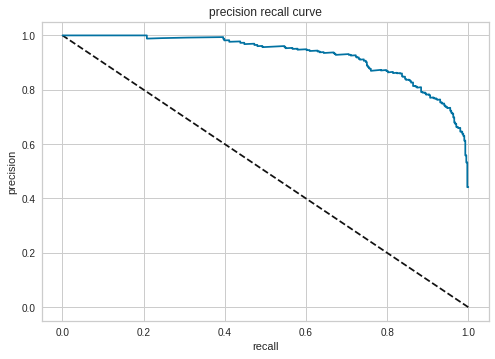

In [162]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [163]:
average_precision_score(y_test, y_pred_proba)

0.9283322848801949

In [164]:
BERT_without_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test, y_pred)
BERT_without_weighted_rec = recall_score(y_test, y_pred)

## BERT Model with Weighted

In [165]:
def create_model():
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("bert-base-uncased")
    input_ids = tf.keras.layers.Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = tf.keras.layers.Dense(80, activation='relu')(embeddings) 
    x = tf.keras.layers.Dropout(0.2, name="dropout")(x) #0.1
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

In [166]:
with strategy.scope():
  
  optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5) #3e-5, 2e-5
  loss = tf.keras.losses.BinaryCrossentropy()
  precision = tf.keras.metrics.Precision()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[precision])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [167]:
pd.Series(y).value_counts(normalize=True)

0    0.815159
1    0.184841
dtype: float64

In [168]:
weights = {0:0.2, 1:0.8}

In [169]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=1, class_weight=weights)

1190/1190 [==============================] - 171s 83ms/step - loss: 0.0843 - precision: 0.6263 - val_loss: 0.1729 - val_precision: 0.7474


In [170]:
y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]


print(classification_report(y_test, y_pred))

133/133 [==============================] - 10s 44ms/step


Exception ignored in: <function Executor.__del__ at 0x7f6edec8e3a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1724
           1       0.75      0.90      0.82       404

    accuracy                           0.92      2128
   macro avg       0.86      0.91      0.88      2128
weighted avg       0.93      0.92      0.93      2128



In [171]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred)) 

1190/1190 [==============================] - 23s 19ms/step


Exception ignored in: <function Executor.__del__ at 0x7f6edec8e3a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


              precision    recall  f1-score   support

           0       0.98      0.96      0.97     15530
           1       0.83      0.93      0.87      3510

    accuracy                           0.95     19040
   macro avg       0.91      0.94      0.92     19040
weighted avg       0.95      0.95      0.95     19040



In [172]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test, y_pred_proba)

133/133 [==============================] - 3s 18ms/step


0.9092289153494503

In [173]:
BERT_with_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test, y_pred)
BERT_with_weighted_rec = recall_score(y_test, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

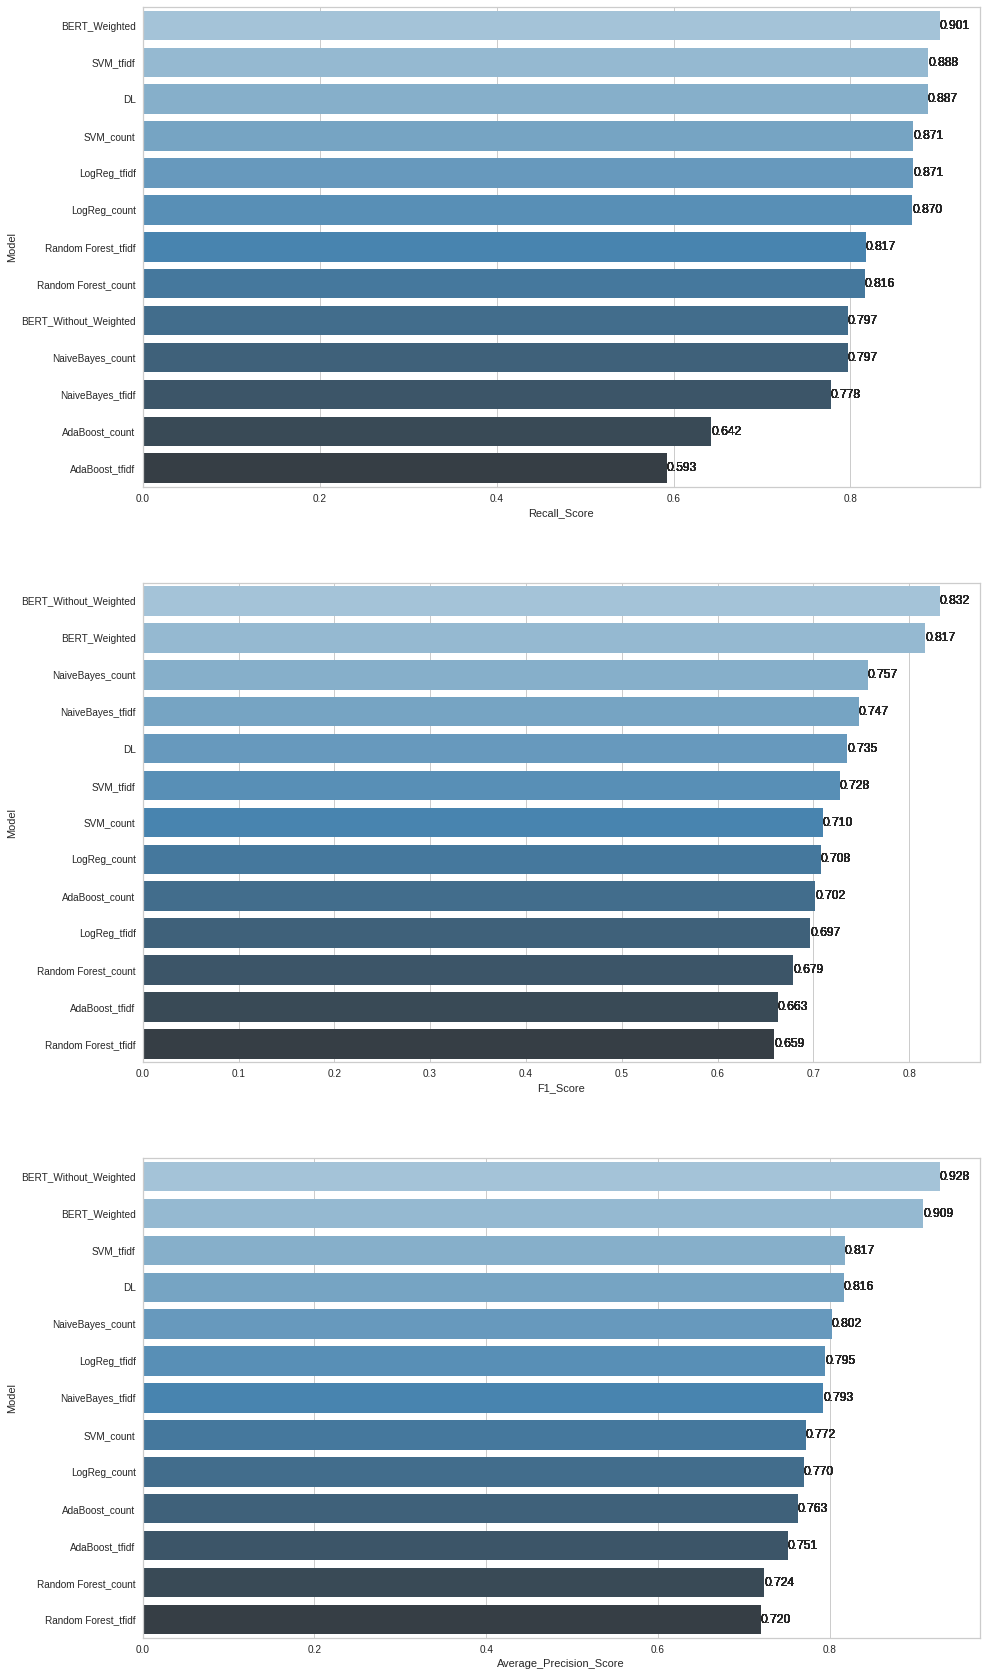

In [174]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted", "BERT_Without_Weighted"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_with_weighted_f1, BERT_without_weighted_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_with_weighted_rec, BERT_without_weighted_rec],
                        
                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_with_weighted_AP, BERT_without_weighted_AP]})

def labels(ax):
                        
     for p in ax.patches:
        ax.bar_label(ax.containers[0],fmt="%.3f")
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();